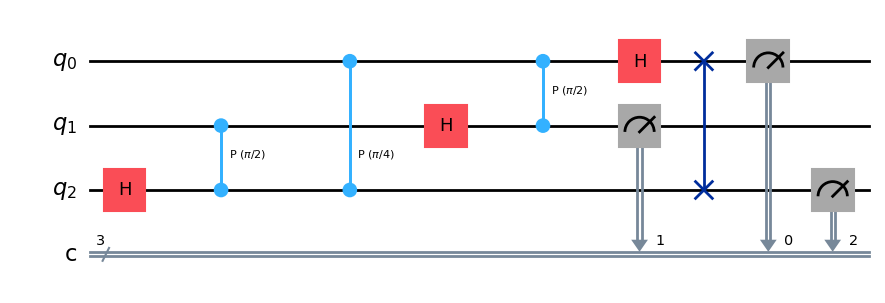

In [7]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
# Qiskitから必要なモジュールをインポート
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector  # Statevectorを使用

import warnings
warnings.simplefilter('ignore')

def qft_rotate_single(circuit, i):
    circuit.h(i)
    for qubit in reversed(range(0, i)):
        circuit.cp(pi / 2**(i - qubit), qubit, i)
        
def qft(circuit, n):
    for i in reversed(range(n)):
        qft_rotate_single(circuit, i)
    for i in range(math.floor(n / 2)):
        circuit.swap(i, n - (i + 1))


n = 3  # 使用する量子ビット数
qc = QuantumCircuit(n, n)

# QFTを適用
qft(qc, n)

# 測定を追加
for i in range(n):
    qc.measure(i, i)

qc.draw('mpl')


{'110': 1024, '010': 1053, '000': 966, '001': 1051, '100': 1020, '011': 1031, '111': 1045, '101': 1002}


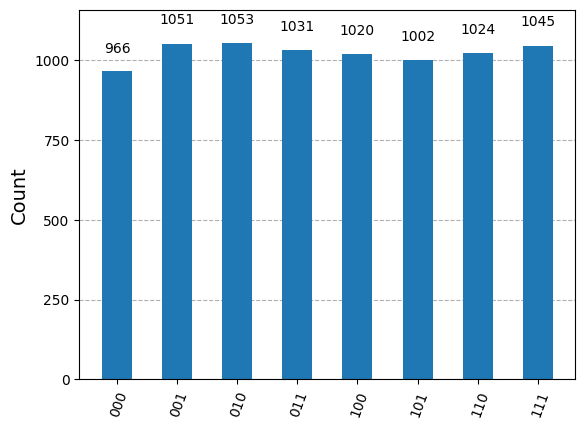

In [8]:

# AerSimulatorを使用して実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=8192).result()

# 結果を取得して表示
answer = result.get_counts()
print(answer)
plot_histogram(answer)


In [11]:

n = 3  # 使用する量子ビット数
qc = QuantumCircuit(n, n)

# 状態ベクトルシミュレーション用の回路（測定を含まない）
qc_statevector = QuantumCircuit(n)

# 測定を含まないQFT回路
qft(qc_statevector, n)

# 状態ベクトルを直接取得
statevector = Statevector.from_instruction(qc_statevector)
print(statevector)


Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
